# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Начало исследования, ознакомление с датасетом:

* Вначале исследования мы выводим таблицу, мы ознакомимся с тем, какие данные и в каком виде нам передали, насколько они соответствуют техническому описанию (должны получить вместе с данными).
* Для этого мы:
1) Загрузим библиотеку Pandas - чтобы удобно работать с табличными данными;
2) Создадим DataFrame из полученных данных;
3) Отобразим нашу таблицу, согласно этикету, принятому в среде Jupyter:
```
display
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from warnings import filterwarnings

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv')
display(df.head(10))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


### Приводим датасет к нормальному виду:

После вывода на экран мы увидели, что в CSV файле были "неправильные" разделители (не запятая). Поэтому нам нужно переписать вывод данных так, чтобы получить нормальную "человекочитаемую" таблицу. Видим, что косяк тут в том, что разделителем выступает обратный "слеш". Укажем это в нашем коде c помощью аргумента с указанием разделителя:

In [ ]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')
pd.set_option('display.max_columns', None)
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Собственно, нам удалось вывести на экран нормальную таблицу. Переходим к предобработке данных. Мы должны "причесать" наш датасет, установить наличие пропусков, принять решение о том, заменять их или нет и чем, возможно, придётся добавить новые столбцы с категориями. Переходим:

### Предобработка данных

#### Описание таблицы, столбцов, строк:

In [ ]:
print(len(df)) #в ручную проверили количество строк 
df.info() #автоматическое описание всей таблицы

23699
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_near

**Описание столбцов датасета:**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

#### Проблемы, выявленые в таблице:
* Во-первых, столбец **cityCenters_nearest** нужно привести к *змеиному* шрифту;
* Во-вторых, в некоторых столбцах пропущено очень много значений в строках: **is_apartment, ceiling_height, living_area, kitchen_area, balcony, kitchen_area, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition**
* В-третьих, не везде понятно, в каких единицах измерения указаны велечины в столбцах: **last_price**

##### Приводим столбец cityCenters_nearest к змеиному шрифту:

In [ ]:
df.rename(columns={"cityCenters_nearest": "city_сenters_nearest"}, inplace=True)
df.info() #сразу убедимся, что название перезаписалось


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### Выводим на экран столбец last_price, нужно убедиться, что там указаны рубли:

In [ ]:
display(df[['last_price', 'first_day_exposition']].sort_values(by='last_price', ascending=True))

,last_price,first_day_exposition
8793,12190.0,2019-03-20T00:00:00
17456,430000.0,2019-04-22T00:00:00
14911,430000.0,2018-06-26T00:00:00
16274,440000.0,2018-07-10T00:00:00
17676,450000.0,2018-02-01T00:00:00
...,...,...
15651,300000000.0,2017-12-18T00:00:00
1436,330000000.0,2018-04-04T00:00:00
14706,401300000.0,2016-02-20T00:00:00
19540,420000000.0,2017-12-06T00:00:00


In [ ]:
print("Самая низкая цена в подборке обнаружена в локации:", df.loc[8793, 'locality_name'])
print("Самая высокая цена в подборке обнаружена в локации:", df.loc[12971, 'locality_name'])

Самая низкая цена в подборке обнаружена в локации: Санкт-Петербург
Самая высокая цена в подборке обнаружена в локации: Санкт-Петербург


Меня смущало, что не указаны единицы измерения. Я зашла на яндекс.Недвижимость, а так же вывела строки с самой низкой и высокой ценами и пришла к выводу, что, всё-таки, это рубли. Квартиры продаются на русскоязычном сайте, а так же, в Российском городе, логично предположить, что цены не были указаны в долларах, евро или других валютах. Будем считать, что они в рублях. 

##### Рассмотрим данные подробней, принимаем решение о пропусках, типах данных:

Это необходимо для того, чтобы принять решение, где данные мы будем просто заменять, а где мы можем удалить строки. Возможно, в каких-то столбцах пропуски мы сможем заменить на 0, или на медиану или моду. Так же, нужно понять, где поменять тип данных. Например, в столбце с конечной ценой тип данных - с плавающей точкой. А зачем? Нам не нужны копейки, их влияние на общую картину полностью нивелируется с учётом стоимости недвижимости. Можно привести данный столбец к целучисленному типу данных.

In [ ]:
df.describe().T #применим метод переворота таблицы, так она воспринимается лучше

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Нам нужно помнить о том, что потеря любых данных - может привести к тому, что конечные выводы будут ошибочны. Поэтому, наша задача - максимально эти данные сохранить. Но и придумывать что-то своё тоже нельзя, так как это может исказить значения во всей выборке. 

<span style="color: blue">**last_price** - огромный разброс данных. Определённо, мы видим выбросы: максимальная стоимость недвижимости аж 763 миллиона рублей - это какое-то супер эксклюзивное жилье и лучше в общей выборке его не рассматривать. И минимальная стоимость: 12190 рублей. Такие суммы лучше было бы отсечь от основной выборки. **total_area** - вероятно, тоже есть выбросы, это видно из минимума и максимума. **rooms** туда же. **ceiling_height** - какая-то безумная высота потолка (100 метров), либо там пропущена запятая (10,0 метров), либо это вообще ошибка. **balcony** - 5 балконов тоже не частое явление.
</span>

 <span style="color: brown">Приходим к выводу, что не плохо было бы посмотреть гистограммы и сводную диаграмму рассеивания.</span>


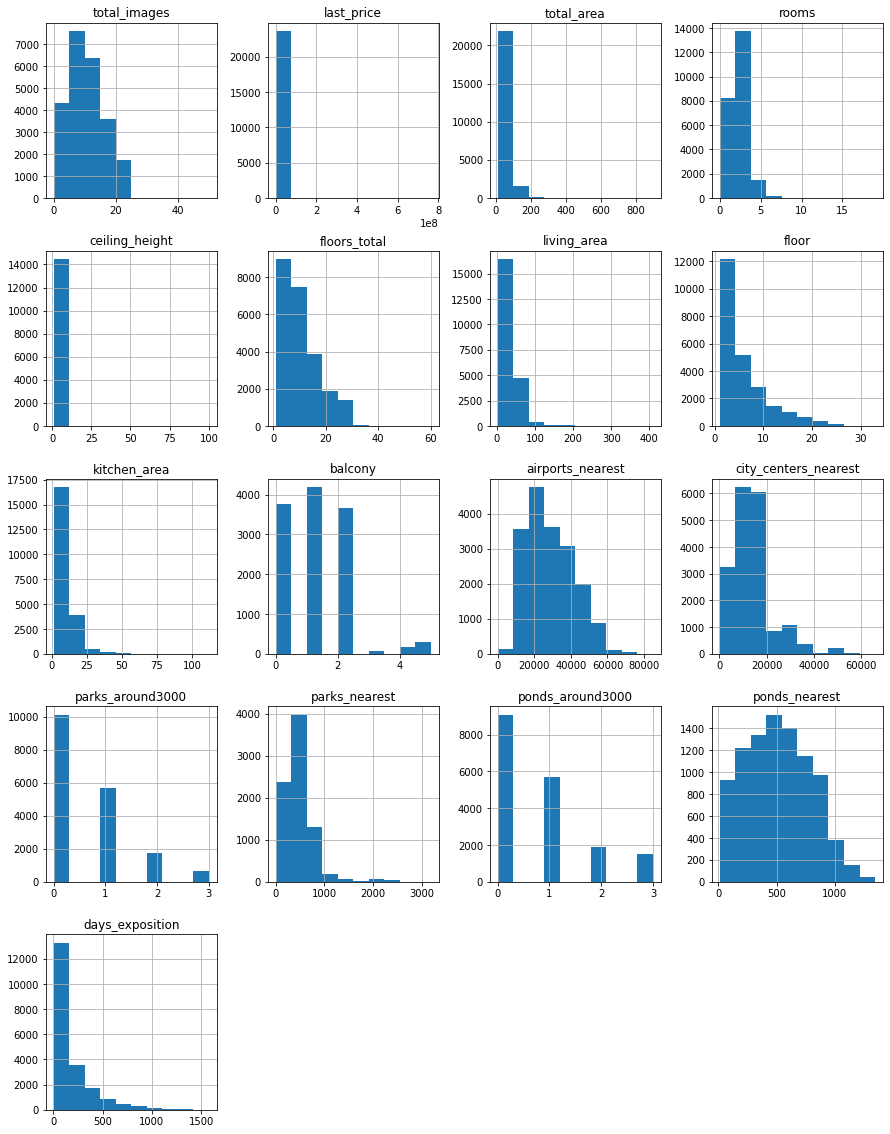

In [ ]:
df.hist(figsize=(15, 20));

Проверим данные на дубликаты:

In [ ]:
print(df.duplicated().sum())
print(len(df))

0
23699


Дубликаты не обнаружены, количество строк сохранено.

##### Рассмотрим пропуски:

Исследуем данные на наличие пропусков, оценим их долю по столбцам:

In [ ]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_сenters_nearest    0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

,is_apartment,parks_nearest,ponds_nearest,balcony,ceiling_height,airports_nearest,city_сenters_nearest,ponds_around3000,parks_around3000,days_exposition,kitchen_area,living_area
0,NaN,482.0,755.0,NaN,2.70,18863.0,16028.0,2.0,1.0,NaN,25.0,51.0
1,NaN,NaN,NaN,2.0,NaN,12817.0,18603.0,0.0,0.0,81.0,11.0,18.6
2,NaN,90.0,574.0,0.0,NaN,21741.0,13933.0,2.0,1.0,558.0,8.3,34.3
3,NaN,84.0,234.0,0.0,NaN,28098.0,6800.0,3.0,2.0,424.0,NaN,NaN
4,NaN,112.0,48.0,NaN,3.03,31856.0,8098.0,1.0,2.0,121.0,41.0,32.0


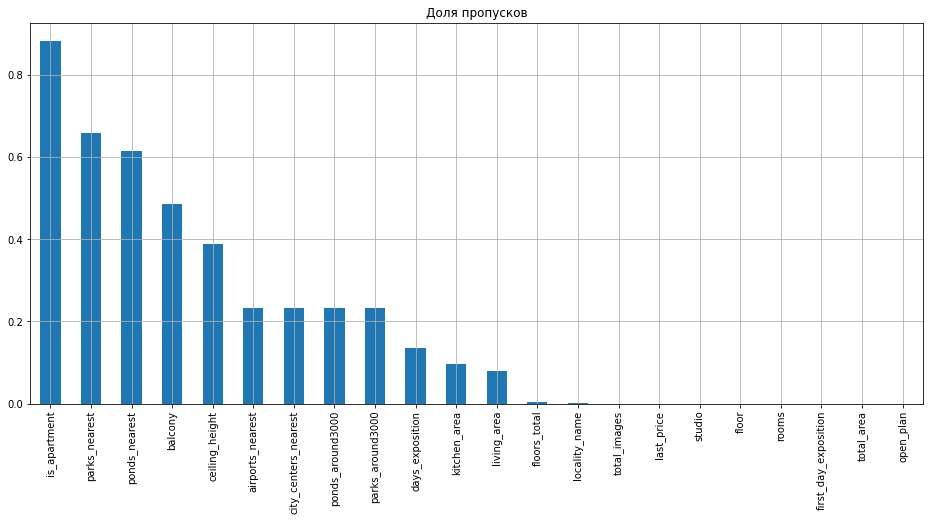

In [ ]:
display(df[['is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony', 'ceiling_height', 'airports_nearest', 'city_сenters_nearest', 'ponds_around3000', 'parks_around3000', 'days_exposition', 'kitchen_area', 'living_area']].head(5))
df.isna().mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(16,7), grid=True, linewidth=2
)
plt.title('Доля пропусков')
plt.show()

Похоже, необходимо изучить все столбцы указанные на графике выше, начиная от `is_apartment` и заканчивая `living_area`. Остальными пропусками, по всей видимости, можно пренебречь. 

###### Столбец is_apartment:
`is_apartment` - доля пропусков 88%, это много, посмотрим что за значения в столбце: 

In [ ]:
print("Количество False и True в столбце:", df['is_apartment'].value_counts())
print()
print("Какие уникальные значения встречаются в столбце:", df['is_apartment'].unique())

Количество False и True в столбце: False    2725
True       50
Name: is_apartment, dtype: int64

Какие уникальные значения встречаются в столбце: [nan False True]


* В столбце встречается огромное количество пропусков - `nan`. Логично предположить, что люди не заполняли этот пункт по той причине, что их недвижимость не является апартаментом и они игнорировали этот пункт. Кто-то заполнил данные полностью и проставил `False` там, где Недвижимость не являлась апартаментами. Вопрос в том, что такое апартаменты и какая недвижимость может называться *апартаментами*, я, например, не знаю, поэтому пока затрудняюсь в решении о том, как менять пропуски? Обратимся к ЦИАН и порталу ПРАВО - [ЦИАН](https://ramenskoye.cian.ru/blogs-apartamenty-podvodnye-kamni-oformlenija-239951/), [ПРАВО](https://pravo.ru/story/236165/). Оказывается, апартаменты вообще не имеют статуста **жилое помещение** и они имеют другой тип регистрации, отличный от жилых помещений. Я прихожу к выводу о том, что во всей выборке было всего 50 помещений, зарегистрированных как апартаменты, и все остальные пропуски можно смело менять на False, так как очевидно, что хозяева апартаментов точно знали, что их помещене имеет подобный статус (все это регистрируется). Следовательно те, кто не указал что у них апартаменты - апартаменты не имели. Ну либо были не честны и не указали статус (что сомнительно и я не думаю что таких обманщиков будет много). 
* Исходя из этого я вообще не вижу особенного смысла в этом столбце что-либо менять. Так как по сути он сообщает, что более чем из 26000 строк всего 50 из них - являются апартаментами. То есть если мне надо будет что-то анализировать с апартаментами, то это будут только эти 50 строк и сравнивать между собой я буду только эти 50 апартаментов. По отношению к остальной выборке эти 50 апартаментов - не имеют смысла и не будут достоверными если я буду вести какой-либо анализ. 
* По сути, данный столбец нам не особо нужен поэтому, в дальнейшем мы будем его просто игнорировать и не использовать в анализе. Возможно, следует вообще удалить все данные связанные с этими 50 строками.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* `'parks_nearest', 'ponds_nearest', 'balcony', 'ceiling_height', 'airports_nearest', 'city_сenters_nearest', 'ponds_around3000', 'parks_around3000', 'days_exposition', 'kitchen_area', 'living_area'` - осталось решить, что делать с этими столбцами. 
* Рассмотрю данные `parks_nearest, ponds_nearest, parks_around3000, ponds_around3000, airports_nearest` - исходя из технического описания, мы узнали, что эти данные заполнялись системой автоматически, при размещении объявления. Такие данные сложно поменять. Так как если вместо пропусков я поставлю 0 - то это значительно исказит данные. Менять эти данные на моду и медиану тоже не рационально, они не отразят тут никакой реальности. Так как жилье располагалось по-всюду, данных много, в ручную (по геопозиции) пропуски я тоже заполнить просто физически не смогу. От куда появились пропуски сказать сложно. Возможно, имели место ошибки при выгрузке данных. Какие-ещё технические ошибки могли возникать мне сказать сложно. **Поэтому я бы посоветовала озаботиться этим вопросом тем людям, которые занимаются обслуживанием системы и проверить, почему их система потеряла такое огромное число данных. Если посмотреть выше - мы увидим, что доля потерянных данных тут более 20% у каждого.** Значит, имеем что имеем и идём дальше. 

###### Столбец `balcony`:

In [ ]:
print("Количество пропусков в столбце с балконами:", len(df[df['balcony'].isna()]))

Количество пропусков в столбце с балконами: 11519


Считаю, вполне логично предположить, что люди не указывали количество балконов в тех случаях, когда в их жилье просто нет балкона. Поэтому все пропуски `NaN` в данном случае мы смело заменим на `0`. Вероятно, кто-нибудь мог просто не заметить, что можно ввести количество балконов в описании недвижимости, но таких, наверняка, будут единицы и этой ошибкой вполне можно принебречь, так и поступим

In [ ]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

###### Столбец `ceiling_heigh`:

Выше методом describe() мы увидили, что тут есть выбросы - типа потолков в 100 метров, посмотрим описательную статистику дополнительно:

In [ ]:
print("Средняя высота потолков:", df['ceiling_height'].mean())
print("Медиана высоты потолков:",df['ceiling_height'].median())
print("Мода высоты потолков:",df['ceiling_height'].mode())


Средняя высота потолков: 2.77149889685604
Медиана высоты потолков: 2.65
Мода высоты потолков: 0    2.5
dtype: float64


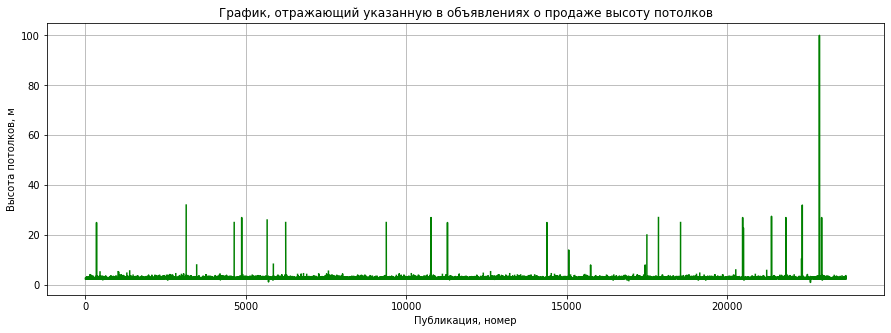

In [ ]:
df['ceiling_height'].plot(color='green', figsize=(15, 5), grid=True)
plt.title('График, отражающий указанную в объявлениях о продаже высоту потолков')
plt.xlabel('Публикация, номер')
plt.ylabel('Высота потолков, м')
plt.show()

* Получились интересные результаты.
* Снова видим выбросы: 100 метровый потолок? 20 метровый потолок? Либо были утеряны точки, либо при выгрузке данных что-то пошло не так. Судя из графика мы спокойно можем просто выкинуть непонятные выбросы из общей выборки, особо на дальнейшие расчеты они, похоже, не повлияют.
* Чаще всего встречается высота потолков равная `2,5 метра`. При этом Медиана все-таки на 10 см больше, а Среднее выше моды аж на 20 см. Неплохой разброс, на самом деле, он достаточно чувствительный. Вспомним высоту шкафов ИКЕЯ :-) и для многих людей такой параметр окажется очень важным при выборе жилья для покупки (ну для меня, например, точно). Поэтому пропуски заменять надо осторожно. Такое большое среднее у нас вышло из-за выбросов. 
* На 0 пропущенные значения не изменить. 
* Можно попробовать выяснить, какие есть строительные нормы по высоте потолков в РФ в регионе Санкт-Петербург? Гугл дал такие результаты: `Высота потолков в квартире – параметр, который регулируется нормативами СНиП № 31-01-2003 п. 5.8.`[СНиП](https://mintest.pro/downloads/document_folders/48/СП%2054.13330.2016%20«Свод%20правил.%20Здания%20жилые%20многоквартирные.%20Актуализированная%20редакция%20СНиП%2031-01-2003.pdf)
* `Природно-климатические и гидрогеологические условия строительства. Возведение промышленного здания проводится на территории Санкт-Петербурга. Зона строительства относится к климатическому району II, подрайону II-В по СНиП 23-01-99* "Строительная климатология". Средняя годовая температура воздуха 4,4С.`
* в СНиП указано следующее: Высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) в климатических подрайонах
IА, IБ, IГ, IД и IIА, определяемых по СП 131.13330, должна быть не менее 2,7 м, а в других климатических
подрайонах - не менее 2,5 м
* Поэтому, ничего удивительного что Мода в 2,5 метра встречается чаще всего. Жилье строят согласно СНиП (в большинстве случаев). Питер это холодный северный регион - чем ниже потолки, тем легче обогревать жилье, `поэтому, я заменю пропуски и нули (которые тоже часто встречаются, судя по моде) на 2,5 метра.` Что соответствует СНиП. 
* Опять же - почему вообще появились это пропуски? Возможно человеческий фактор - люди при оформлении продажи недвижимости на внесли показатель (лень было доставать рулетку и мерить высоту потолка)? Возможно - машинный фактор, например, люди не заметили вообще, что можно такой показатель внести? И, возможно, часть данных пропала при выгрузке данных. 

###### Столбец city_сenters_nearest

In [ ]:
print("Доля пропусков {:.1%}".format(df['city_сenters_nearest'].isna().sum()/len(df)))
print("Медиана:", df['city_сenters_nearest'].median())

print("Среднее:", df['city_сenters_nearest'].mean())
print("Мода:", df['city_сenters_nearest'].mode())

Доля пропусков 23.3%
Медиана: 13098.5
Среднее: 14191.277832783278
Мода: 0    8460.0
dtype: float64


* Значительная доля пропусков, как мне кажется. Из 100 значений - 23 бы были утеряны. 
* Это картографический параметр, он должен был заполняться автоматически. 
* Я предполагаю, что данные могли теряться в том случае, если, например, слишком далеко от центра располагалось жилье; Жилье продавали в новом районе, район не попал в карты (не был оформлен и потому картографиески автоматического заполнения не произошло); Потеря данных при выгрузке. В любом случае, как я упоминала выше, разработчики приложения должны проверить что у них происходит, не всё ок, нельзя терять столько данных по важным параметрам. 

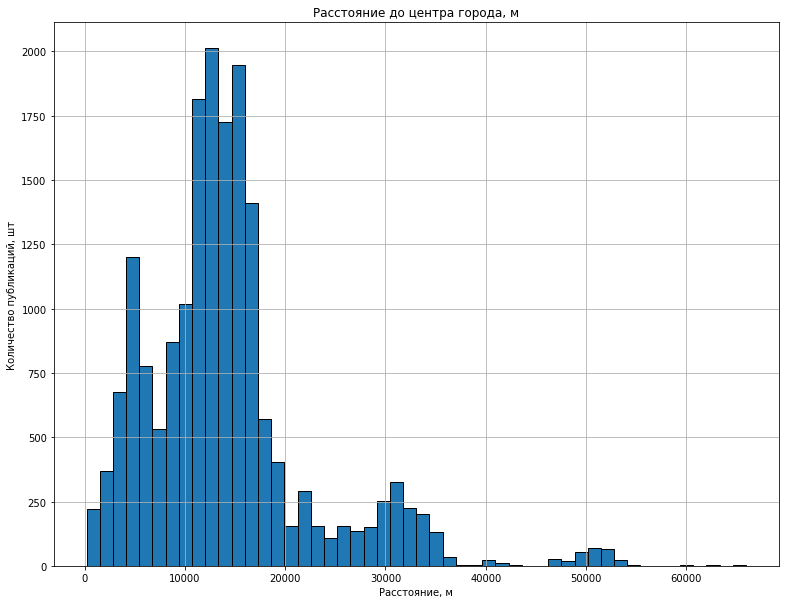

In [ ]:
df['city_сenters_nearest'].hist(grid=True, figsize=(13,10), bins=50, backend=None, legend=False, edgecolor="black")
plt.title('Расстояние до центра города, м')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество публикаций, шт')
plt.show()

Ну, тут стало понятно что особо никак не заменить данные. Можно только разве что пустой строкой или оставить так. Потому что, всё-таки, жилье продают даже в 60 км от центра (пригород). Мы не можем заменить данные на моду, медиану, среднее, ни на что. Возможно, нужно разбить типы жилья на категории по расстоянию от центра. А остальные данные заменить на 0 или пустую строку. Посмотрим данные дальше и определимся окончательно. 

######  Столбец days_exposition

In [ ]:
print('Доля пропусков внутри столбца "days_exposition": {:.1%}'.format(df['days_exposition'].isna().sum()/len(df)))

Доля пропусков внутри столбца "days_exposition": 13.4%


<function matplotlib.pyplot.show(close=None, block=None)>

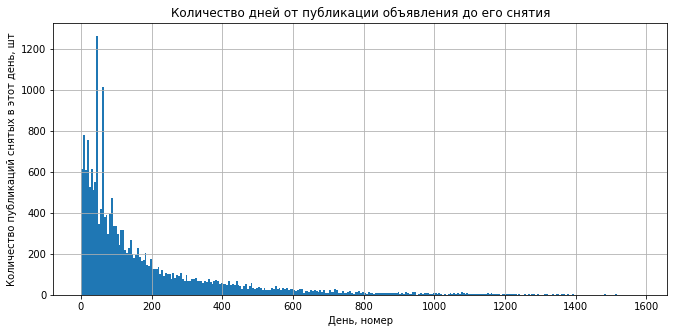

In [ ]:
df['days_exposition'].hist(bins=300, figsize=(11, 5), grid=True)
plt.title('Количество дней от публикации объявления до его снятия')
plt.xlabel('День, номер')
plt.ylabel('Количество публикаций снятых в этот день, шт')
plt.show

Видим, что основное количество снятий публикаций происходит в промежутке между 0 дней и 600 (почти 2 года) дней. Пропуски заменим значением 0. Потому что, получается, действительно в этот же день публикация снималась с сайта (может это была случайная публикация - например, пользователь хотел посмотреть как будет выглядеть на сайте публикация, а может - недвижимость сразу купили). В общем, 0 тут самое логичное. А дальше, там, где будет 0 - мы не будем рассматривать эти публикации в исследовании. 

######  Столбец kitchen_area

Доля пропусков внутри столбца "kitchen_area": 9.6%
Me: 9.1
Среднее: 10.569807198543485
Мо: 0    6.0
dtype: float64


<AxesSubplot:>

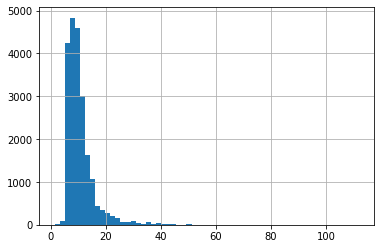

In [ ]:
print('Доля пропусков внутри столбца "kitchen_area": {:.1%}'.format(df['kitchen_area'].isna().sum()/len(df)))
print("Me:", df['kitchen_area'].median())
print("Среднее:", df['kitchen_area'].mean())
print("Мо:", df['kitchen_area'].mode())
df['kitchen_area'].hist(bins=60)

###### Столбец living_area

Доля пропусков внутри столбца "living_area": 8.0%
Me: 30.0
Среднее: 34.457852427601395
Мо: 0    18.0
dtype: float64


<AxesSubplot:>

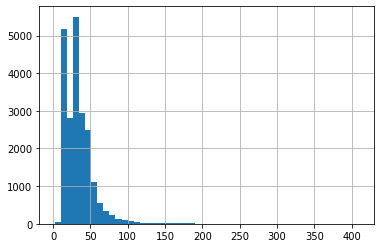

In [ ]:
print('Доля пропусков внутри столбца "living_area": {:.1%}'.format(df['living_area'].isna().sum()/len(df)))
print("Me:", df['living_area'].median())
print("Среднее:", df['living_area'].mean())
print("Мо:", df['living_area'].mode())
df['living_area'].hist(bins=50)

###### Столбцы locality_name, floors_total:

In [ ]:
display(df.head(3))
print('Доля пропусков внутри столбца "floors_total": {:.1%}'.format(df['floors_total'].isna().sum()/len(df)))
print('Доля пропусков внутри столбца "locality_name": {:.1%}'.format(df['locality_name'].isna().sum()/len(df)))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Доля пропусков внутри столбца "floors_total": 0.4%
Доля пропусков внутри столбца "locality_name": 0.2%


* В `locality_name` в стобце русскоязычное название локации продажи. Есть пропуски - их точно нужно заменить. Заменим на "Данных нет", с учётом стиля столбца.
* В `floors_total` количество пропусков незначительное, скорее всего, это точно какая-то ошибка при выгрузке данных. Возможно, это частные дома, имеющие один этаж. Заменим на 0. Доля пропусков так мала, что на общую выборку это не должно повлиять. 

##### Замена пропусков в столбцах:

Есть несколько способов заменить пропуски: `.fillna(), .replace(), map(), data.str.replace()`.
* для начала, я создам словарь, куда передам для столбцов с пропусками значения, на которые я хочу эти пропуски заменить. И потом, применю метод fillna(), считаю, его будет достаточно для пропусков в нашем проекте, в аргумент метода `value` передам созданный мной словарь.
* а для потолков, как я упомянала выше, я буду заменять пропуски Модой:

In [ ]:
df['ceiling_height'].mode()


0    2.5
dtype: float64

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
#Найдём - среднюю ОБЩУЮ площадь. среднюю - ЖИЛУЮ площадь. среднюю - КУХОННУЮ площадь.
#Найдём - отношение средней ЖИЛОЙ к средней ОБЩЕЙ - заменим пропуски.
#Найдём - соотношение средней КУХОННОЙ к средней ОБЩЕЙ - заменим пропуски.
avr_total_area = df['total_area'].mean()
avr_living_area = df['living_area'].mean()
avr_kitchen_area = df['kitchen_area'].mean()

avr_living_area = (avr_living_area/avr_total_area).round(1) #перезаписала переменную, чтоб не заполнять память
avr_kitchen_area = (avr_kitchen_area/avr_total_area).round(1) #перезаписала переменную, чтоб не заполнять память

print('avr_living_area:', avr_living_area)
print('avr_kitchen_area:', avr_kitchen_area)

avr_living_area: 0.6
avr_kitchen_area: 0.2


In [ ]:
ceiling_height_moda = 2.5 # мода для высоты потолков, так как моды две 0 и 2,5 - мы оставим только нормальное значение
avr_living_area = 0.5 #замена значений в общей жилой площади
avr_kitchen_area = 0.2 #замена значений в кухонной площади

#Словарь для аргумента метода Fillna()
values_for_fillna = {'balcony':0, 'ceiling_height':ceiling_height_moda, 'locality_name':"Данных нет",
                     'days_exposition':0, 'kitchen_area':0, 'living_area':0, 'city_сenters_nearest':0,'floors_total':0,
                     'living_area':avr_living_area, 'kitchen_area':avr_kitchen_area}

#Заменяем пропущенные значения:
df.fillna(value=values_for_fillna, inplace=True)

#Удаляем series, где было много пропущенно и где мы ничего не меняли,и удалим столбцы которые не будем исследовать,
#создадим новый фрейм данных для этого:
df2 = df.drop(['total_images', 
                       'is_apartment', 
                       'studio', 'open_plan', 
                       'airports_nearest',
                       'parks_around3000', 'parks_nearest',
                       'ponds_around3000', 'ponds_nearest'], 1)

df2.info()
display(df2.describe().T)
display(df2.head(3))
display(df2.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        23699 non-null  float64
 5   floors_total          23699 non-null  float64
 6   living_area           23699 non-null  float64
 7   floor                 23699 non-null  int64  
 8   kitchen_area          23699 non-null  float64
 9   balcony               23699 non-null  float64
 10  locality_name         23699 non-null  object 
 11  city_сenters_nearest  23699 non-null  float64
 12  days_exposition       23699 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.4+ MB


,count,mean,std,min,25%,50%,75%,max
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.0,4650000.0,6800000.00,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.0,52.0,69.90,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.0,2.0,3.00,19.0
ceiling_height,23699.0,2.666160e+00,9.953554e-01,1.0,2.5,2.5,2.70,100.0
floors_total,23699.0,1.063509e+01,6.616396e+00,0.0,5.0,9.0,16.00,60.0
living_area,23699.0,3.173108e+01,2.305494e+01,0.5,17.8,29.0,41.10,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.0,4.0,8.00,33.0
kitchen_area,23699.0,9.573039e+00,6.392575e+00,0.2,6.3,9.0,11.44,112.0
balcony,23699.0,5.910798e-01,9.592982e-01,0.0,0.0,0.0,1.00,5.0
city_сenters_nearest,23699.0,1.088643e+04,9.634614e+03,0.0,2242.0,11247.0,15248.50,65968.0


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,25.0,0.0,Санкт-Петербург,16028.0,0.0
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.5,11.0,18.6,1,11.0,2.0,посёлок Шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.5,5.0,34.3,4,8.3,0.0,Санкт-Петербург,13933.0,558.0


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition
23689,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,9.10,2.0,Санкт-Петербург,16081.0,29.0
23690,5500000.0,52.00,2018-07-19T00:00:00,2,2.50,5.0,31.0,2,6.00,0.0,Санкт-Петербург,6263.0,15.0
23691,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,10.60,1.0,Санкт-Петербург,4489.0,519.0
23692,1350000.0,30.00,2017-07-07T00:00:00,1,2.50,5.0,17.5,4,6.00,0.0,Тихвин,0.0,413.0
23693,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,8.00,0.0,Петергоф,34104.0,239.0
23694,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,13.83,0.0,Санкт-Петербург,4232.0,0.0
23695,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.0,4,8.50,0.0,Тосно,0.0,45.0
23696,2500000.0,56.70,2018-02-11T00:00:00,2,2.50,3.0,29.7,1,0.20,0.0,село Рождествено,0.0,0.0
23697,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,0.5,12,23.30,2.0,Санкт-Петербург,10364.0,602.0
23698,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,9.00,0.0,поселок Новый Учхоз,0.0,0.0


И так, был создан новый фрейм данных. Число строк сохранено (23699), наиболее информативные столбцы тоже сохранены. Изучим теперь, где требуется поменять тип данных и решим, что делать с непонятными значениями (типа высотой потолков в 100 метров). 

##### Заменим, где логично, тип данных в Series:

* 0   last_price            23699 non-null  float64 - **заменим на int** (копейки в миллионах нам для подсчета не нужны);
* 1   total_area            23699 non-null  float64 - округлим до 1 знака после запятой **float** (так удобнее);
* 2   first_day_exposition  23699 non-null  object - по заданию Практикума, **нужно перевести в datetime**; 
* 3   rooms                 23699 non-null  int64 - оставим целые числа **int**(3,5 комнат не бывает);  
* 4   ceiling_height        23699 non-null  float64 - округлим до 1 знака после запятой  **float**;
* 5   floors_total          23699 non-null  float64 - заменим до целого **int**;
* 6   living_area           23699 non-null  float64 - округлим до 1 знака после запятой  **float**;
* 7   floor                 23699 non-null  int64  - заменим на целое **int**;
* 8   kitchen_area          23699 non-null  float64 - округлим до 1 знака после запятой **float**;
* 9   balcony               23699 non-null  float64 - заменим на **int**, балкон целостная структура;
* 10  locality_name         23699 non-null  object - оставляем как есть;
* 11  city_сenters_nearest  23699 non-null  float64 - округлим до 1 знака после запятой **float**;
* 12  days_exposition       23699 non-null  float64 - заменим на целое число, то есть приведем до 1 дня **int**. Пол дня считать не будем.

In [ ]:
integ_var = ['last_price', 'rooms', 'floors_total', 'floor', 'balcony', 'days_exposition'] #список столбцов на замену целыми числами;
float_var = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'city_сenters_nearest'] #список столбцов на замену числом с плавающей точкой с 1 значением после запятой

#составляем циклы для целого и для плавающего числа:
for col in integ_var:
    df2[col] = df2[col].astype('int')

for col in float_var:
    df2[col] = df2[col].astype('float32').round(1)
    
    
# переведем столбец first_day_exposition в формат datetime

df2['first_day_exposition'] = pd.to_datetime(df2['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

    

In [ ]:
df2.info()
display(df2.head(3))
display(df2.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  int64         
 1   total_area            23699 non-null  float32       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        23699 non-null  float32       
 5   floors_total          23699 non-null  int64         
 6   living_area           23699 non-null  float32       
 7   floor                 23699 non-null  int64         
 8   kitchen_area          23699 non-null  float32       
 9   balcony               23699 non-null  int64         
 10  locality_name         23699 non-null  object        
 11  city_сenters_nearest  23699 non-null  float32       
 12  days_exposition       23699 non-null  int64         
dtypes: datetime64[ns

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition
0,13000000,108.000000,2019-03-07,3,2.7,16,51.000000,8,25.0,0,Санкт-Петербург,16028.0,0
1,3350000,40.400002,2018-12-04,1,2.5,11,18.600000,1,11.0,2,посёлок Шушары,18603.0,81
2,5196000,56.000000,2015-08-20,2,2.5,5,34.299999,4,8.3,0,Санкт-Петербург,13933.0,558


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition
23696,2500000,56.700001,2018-02-11,2,2.5,3,29.700001,1,0.200000,0,село Рождествено,0.0,0
23697,11475000,76.800003,2017-03-28,2,3.0,17,0.500000,12,23.299999,2,Санкт-Петербург,10364.0,602
23698,1350000,32.299999,2017-07-21,1,2.5,5,12.300000,1,9.000000,0,поселок Новый Учхоз,0.0,0


##### Устраняем неявные дубликаты в названиях насёлнных пунктов:

In [ ]:
df2['locality_name'].unique().tolist()


['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [ ]:
#я увидела, что где-то есть Ё а где-то есть Е, меняем
df2['locality_name'] = df2['locality_name'].str.replace('ё', 'е', regex=True)


In [ ]:
len(df2['locality_name'].unique()) #хочу посмотреть сколько вообще локаций

331

In [ ]:
df['locality_name'].isna().sum() #увидели что пропусков нет  (мы их раньше меняли)

0

* В библиотеке Pandas есть метод `isupper() -Check whether all characters in each string are uppercase.` Попробуем применить его через цикл, который уберём в функцию. Функция должна будет убрать все, что с маленькой буквы. В цикле будем ходить по строке Series - название локации. 

In [ ]:
def cut_off_small(row):
    for symbol in range(len(row)): #пройтись по всем индексам букв в строке
        if row[symbol].isupper():
            return row[symbol: len(row)]             

df2['locality_name_upper'] = df2['locality_name'].apply(cut_off_small)         

In [ ]:
df2['locality_name_upper'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [ ]:
len(df2['locality_name_upper'].unique())

306

Ну вот, таким образом мы даже удалили 25 дубликатов. 

##### Удаление аномалий:

Попытаемся удалить аномалии в столбцах: `ceiling_height, last_price, total_area, rooms`.
* Взяться они могли от куда угодно: пользователь ввёл с ошибкой, ошибка при выгрузке данных

In [ ]:
df2[['ceiling_height', 'last_price', 'total_area', 'rooms']].describe().T


,count,mean,std,min,25%,50%,75%,max
ceiling_height,23699.0,2.668741e+00,9.955493e-01,1.0,2.5,2.5,2.700000e+00,100.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.0,4650000.0,6.800000e+06,763000000.0
total_area,23699.0,6.034863e+01,3.565409e+01,12.0,40.0,52.0,6.990000e+01,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.0,2.0,3.000000e+00,19.0


И так, мы видим какие-то аномальные значения в данных.

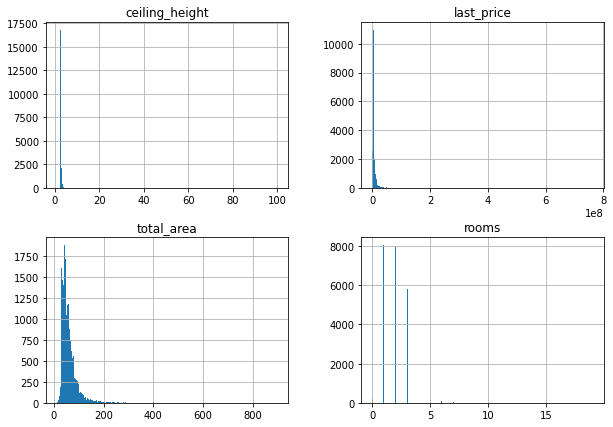

In [ ]:
df2[['ceiling_height', 'last_price', 'total_area', 'rooms']].hist(bins=300, figsize=(10,7));

* Нужно придумать функцию, которая выбросы удалит.
* Нужно решить, что будем  считать выбросами:
* Установим для себя **меру разброса** данных в датафрейме:
* Будем считать, что самые *чистые* данные находятся в **межквартильном размахе**;
* Межквартильный размах *IQR = Q3-Q1*, где Q1 - медиана малых значений, а Q3 - медиана больших значений. 
* Обратимся к выводу Д.Тьюки и его "ящикам с усами": если расстояние от точки до края ящика (Q1 | Q2) больше 1,5Q - то значение он называл **аномальным**. То есть, мы будем считать нормальным всё то, что слежит внутри 1.5Q (согласно Д.Тьюки). То есть, всё что не попало в ящик и его усы - аномалии.
* Следовательно, функция должна отбросить все то, что уходит за 1,5Q. 
* `**Я не стала использовать Стандартное отклонение, так как мы не доказали, что данные принадлежат нормальному распределнию.**`

Будем переписывать под себя:
* `Q1 =  df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
df[(df['y'] < Q1-1.5*IQR ) | (df['y'] > Q3+1.5*IQR)]['y']`
![image.png](attachment:image.png)

In [ ]:
q1 = df2['ceiling_height'].quantile(0.25)
q3 = df2['ceiling_height'].quantile(0.75)
iqr = q3 - q1
df2 = df2.query('@q1 - 1.5*@iqr < ceiling_height < @q3 + 1.5*@iqr')

In [ ]:
q1 = df2['last_price'].quantile(0.25)
q3 = df2['last_price'].quantile(0.75)
iqr = q3 - q1
df2 = df2.query('@q1 - 1.5*@iqr < last_price < @q3 + 1.5*@iqr')

In [ ]:
q1 = df2['total_area'].quantile(0.25)
q3 = df2['total_area'].quantile(0.75)
iqr = q3 - q1
df2 = df2.query('@q1 - 1.5*@iqr < total_area < @q3 + 1.5*@iqr')

In [ ]:
q1 = df2['rooms'].quantile(0.25)
q3 = df2['rooms'].quantile(0.75)
iqr = q3 - q1
df2 = df2.query('@q1 - 1.5*@iqr < rooms < @q3 + 1.5*@iqr')

In [ ]:
df2[['ceiling_height', 'last_price', 'total_area', 'rooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
ceiling_height,18648.0,2.567117e+00,1.031899e-01,2.2,2.500000e+00,2.5,2.6,2.900000e+00
last_price,18648.0,4.423501e+06,1.823187e+06,430000.0,3.200000e+06,4180000.0,5450000.0,1.013000e+07
total_area,18648.0,4.953826e+01,1.498308e+01,12.0,3.770000e+01,46.0,60.0,9.520000e+01
rooms,18648.0,1.785875e+00,7.874301e-01,0.0,1.000000e+00,2.0,2.0,3.000000e+00


В общем, мы избавились от выбросов и выполнили задание 2.4

##### Общий вывод:

* Мы провели предобработку данных:
* 1) Взглянули на таблицу, посмотрели общую информацию о ней. Узнали сколько столбцов, сколько строк, какие типы Series имеются;
* 2) Поискали ЯВНЫЕ дубликаты. Ничего не нашли;
* 3) Посмотрели, в каких столбцах есть пропуски и какую долю они составляют, столбцы с огромным числом пропусков - исследовали;
* 4) Столбцы, где пропуски явно можно было заменить - заменили (например, высоту потолков на моду, согласно СНиП), где можно было логически понять, на что менять - тоже заменили. Где не смогли понять - просто удалили столбцы, всё равно дальше для ответов на вопросы Практикума они не понадобятся;
* 5) Поэтому, создали новый датафрейм, с очищенными данными;
* 6) В этом датафрейме изучили столбец с названиями населённых пунктов, где продавалась недвижимость - нашли неявные дубликаты. Неявные дубликаты были удалены. 
* 7) Обнаружили, что столбцы типа наличие водоёма ближайшие 3000 метров, парка и т.д. - которые формировались автоматически имеют явную проблему. При выгрузке данных - очень много данных было утеряно. Либо их не было изначально. Они стали непоказательными и их нельзя использовать для анализа данных. Об этом необходимо сообщить разработчикам. Столбцы мы удалили из датафрейма.
* 8) Столбцы с аномалиями почистили.

#### Новые столбцы, описание данных:

Для удобства, выведем на экран список столбцов с данными, которые имеем на данный момент:

In [ ]:
df2.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'locality_name', 'city_сenters_nearest',
       'days_exposition', 'locality_name_upper'],
      dtype='object')

#####  Цена одного квадратного метра:

Необходимо найти цену одного квадратного метра квартиры. Разделим итоговую стоимость на метраж квартиры.

In [ ]:
df2['price_per_sq_m'] = df2['last_price']/df2['total_area']
df2['price_per_sq_m'] = df2['price_per_sq_m'].astype('float').round(1)
df2.head(2)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition,locality_name_upper,price_per_sq_m
1,3350000,40.400002,2018-12-04,1,2.5,11,18.600000,1,11.0,2,поселок Шушары,18603.0,81,Шушары,82920.8
2,5196000,56.000000,2015-08-20,2,2.5,5,34.299999,4,8.3,0,Санкт-Петербург,13933.0,558,Санкт-Петербург,92785.7


##### День, месяц, год публикации объявления:

In [ ]:
df2['weekday'] = pd.to_datetime(df2['first_day_exposition']).dt.weekday
df2['weekday'] = df2['weekday'].astype('Int64')
df2['year'] = pd.to_datetime(df2['first_day_exposition']).dt.year
df2['year'] = df2['year'].astype('Int64')
df2['month'] = pd.to_datetime(df2['first_day_exposition']).dt.month
df2['month'] = df2['month'].astype('Int64')
df2.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition,locality_name_upper,price_per_sq_m,weekday,year,month
1,3350000,40.400002,2018-12-04,1,2.5,11,18.600000,1,11.0,2,поселок Шушары,18603.0,81,Шушары,82920.8,1,2018,12
2,5196000,56.000000,2015-08-20,2,2.5,5,34.299999,4,8.3,0,Санкт-Петербург,13933.0,558,Санкт-Петербург,92785.7,3,2015,8
5,2890000,30.400000,2018-09-10,1,2.5,12,14.400000,5,9.1,0,городской поселок Янино-1,0.0,55,Янино-1,95065.8,0,2018,9
6,3700000,37.299999,2017-11-02,1,2.5,26,10.600000,6,14.4,1,поселок Парголово,19143.0,155,Парголово,99195.7,3,2017,11
7,7915000,71.599998,2019-04-18,2,2.5,24,0.500000,22,18.9,2,Санкт-Петербург,11634.0,0,Санкт-Петербург,110544.7,3,2019,4


##### Тип этажа квартиры:

По заданию, нужно сделать категориальную переменную. Тип этажа квартиры нужно сделать: первый, последний, другой. Значит, делаем функцию:

In [ ]:
def floor_type(floor, floors_total): #посмотрели, какие столбцы имеем, я приводила список чуть выше
    if floor == 1:
        return "первый"
    elif floor == floors_total:
        return "последний"
    else:
        return "другой"  

In [ ]:
df2['floor_categ'] = df2.apply(lambda x: floor_type(x.floor, x.floors_total), axis=1)
df2['floor_categ'].unique()

array(['первый', 'другой', 'последний'], dtype=object)

##### Расстояние в километрах до центра города:

In [ ]:
df2['km_to_center'] = df2['city_сenters_nearest']/1000 #в 1 километре - 1000 метров
df2['km_to_center'] = df2['km_to_center'].astype('float32').round(1) #32 я выбрала чтоб меньше места ело
df2.head(2)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition,locality_name_upper,price_per_sq_m,weekday,year,month,floor_categ,km_to_center
1,3350000,40.400002,2018-12-04,1,2.5,11,18.600000,1,11.0,2,поселок Шушары,18603.0,81,Шушары,82920.8,1,2018,12,первый,18.6
2,5196000,56.000000,2015-08-20,2,2.5,5,34.299999,4,8.3,0,Санкт-Петербург,13933.0,558,Санкт-Петербург,92785.7,3,2015,8,другой,13.9


#### Общий вывод:

Мы добавили столбцы, которые требовалось добавить по заданию. Пришлось применять функци, менять тип данных, столбцы добавлены.

Сначала построю градиентную таблицу, отражающую всякие коррелияции одного с другим.


In [ ]:
df2.corr().style.background_gradient()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,city_сenters_nearest,days_exposition,price_per_sq_m,weekday,year,month,km_to_center
last_price,1.000000,0.632866,0.385744,0.213779,0.301985,0.401002,0.205582,0.373892,0.099576,0.194908,0.014844,0.649642,-0.008317,0.021624,0.001354,0.194930
total_area,0.632866,1.000000,0.808253,0.098537,0.019446,0.695200,0.001196,0.329034,0.086638,0.013221,0.056515,-0.137290,-0.005145,-0.048733,0.003587,0.013231
rooms,0.385744,0.808253,1.000000,-0.058279,-0.219780,0.710087,-0.163160,0.040045,0.022717,0.013081,0.032685,-0.269458,-0.002017,-0.021237,-0.008881,0.013083
ceiling_height,0.213779,0.098537,-0.058279,1.000000,0.200784,0.050253,0.121685,0.214980,0.158539,0.007712,0.024228,0.185276,-0.023211,0.053450,-0.013838,0.007734
floors_total,0.301985,0.019446,-0.219780,0.200784,1.000000,-0.128381,0.657931,0.267776,0.146645,0.063880,-0.008817,0.389601,0.010408,-0.001907,0.013651,0.063842
living_area,0.401002,0.695200,0.710087,0.050253,-0.128381,1.000000,-0.096489,0.293158,0.103069,0.045484,0.059587,-0.143968,-0.021273,-0.060736,0.008788,0.045480
floor,0.205582,0.001196,-0.163160,0.121685,0.657931,-0.096489,1.000000,0.183074,0.146154,0.043125,-0.009194,0.277615,0.009871,-0.004538,0.020278,0.043127
kitchen_area,0.373892,0.329034,0.040045,0.214980,0.267776,0.293158,0.183074,1.000000,0.141020,0.016232,0.054644,0.157137,-0.021335,-0.032163,0.027115,0.016202
balcony,0.099576,0.086638,0.022717,0.158539,0.146645,0.103069,0.146154,0.141020,1.000000,0.005042,-0.019189,0.049579,-0.003280,-0.000011,0.007499,0.005021
city_сenters_nearest,0.194908,0.013221,0.013081,0.007712,0.063880,0.045484,0.043125,0.016232,0.005042,1.000000,-0.001257,0.244806,0.002261,-0.020511,-0.007551,0.999997


**Первый вывод на основе корреляций:**
Чем больше площадь Недвижимости, тем выше конечная цена. Особо примечатльных корреляций, других, я не вижу. 

#### общая площадь

In [ ]:
df2['total_area'].describe()

count    18648.000000
mean        49.538258
std         14.983079
min         12.000000
25%         37.700001
50%         46.000000
75%         60.000000
max         95.199997
Name: total_area, dtype: float64

<AxesSubplot:>

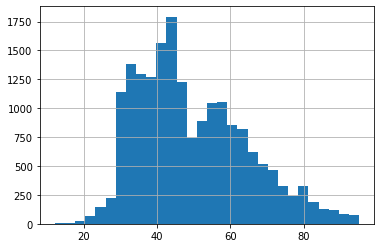

In [ ]:
df2['total_area'].hist(bins=30)

Давайте срежим данные от 1 до 3 квартиля и посмотрим как распределяются данные там. Данные срезаем методом loc.


<AxesSubplot:>

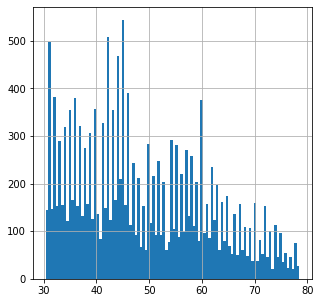

In [ ]:
loc_total_area = df2.loc[(df2['total_area'] >= df2['total_area'].quantile(.05))&
                         (df2['total_area'] <= df2['total_area'].quantile(.95)), 'total_area']
loc_total_area.hist(bins=100, figsize=(5,5))

Теперь видно, что **средняя стоимость недвижимости в районе 3-6 миллионов рублей.** 
В книге "Python и анализ данных. Второе издание" (У. Маккини, 2020) сказано, что лучше всего все параметры графика задавать в одной ячейке ноутбука, так как данные для графика каждый раз сбрасываются при чтении ячейки. Поэтому далее всё, относительно графика, попробуем сделать в одной ячейке. 

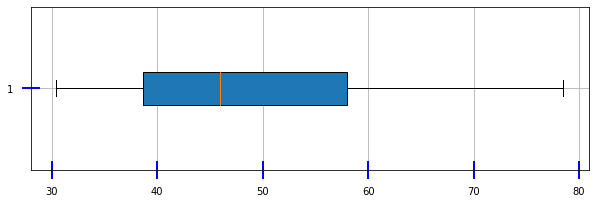

In [ ]:
#В бибилиотеке matplotlib нашла все параметры, которые можно использовать для графика
#вводим разрем рисунка
plt.figure(figsize=(10,3))
#обозначаем, какой тип графика строим и вводим параметры в аргументы
plt.boxplot(loc_total_area, sym="o", vert=False, widths = 0.2, patch_artist = True)

#Применим оформление
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 18,    #  Длина делений
               width = 2,     #  Ширина делений
               color = 'blue',    #  Цвет делений
               pad = 8,    #  Расстояние между черточкой и ее подписью
             ) 
#Отобразим сетку
plt.grid()
plt.show() 

По графику ясно, что **средняя площадь недвижимости держится в интервале примерно от 40 до почти 60 квадратных метров.** Есть и больше и меньше, но таких объявлений о продаже значительно меньше.

In [ ]:
df2.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'locality_name', 'city_сenters_nearest',
       'days_exposition', 'locality_name_upper', 'price_per_sq_m', 'weekday',
       'year', 'month', 'floor_categ', 'km_to_center'],
      dtype='object')

In [ ]:
df2.describe().T #вывожу описательную статистику, на основе нее буду делать срезы данных, чтобы представить диаграммы размаха 

,count,mean,std,min,25%,50%,75%,max
last_price,18648.0,4.423501e+06,1.823187e+06,430000.0,3.200000e+06,4180000.0,5450000.0,1.013000e+07
total_area,18648.0,4.953826e+01,1.498308e+01,12.0,3.770000e+01,46.0,60.0,9.520000e+01
rooms,18648.0,1.785875e+00,7.874301e-01,0.0,1.000000e+00,2.0,2.0,3.000000e+00
ceiling_height,18648.0,2.567117e+00,1.031899e-01,2.2,2.500000e+00,2.5,2.6,2.900000e+00
floors_total,18648.0,1.113197e+01,6.702378e+00,0.0,5.000000e+00,9.0,16.0,6.000000e+01
living_area,18648.0,2.586356e+01,1.278872e+01,0.5,1.720000e+01,27.0,34.0,8.000000e+01
floor,18648.0,6.103335e+00,5.006179e+00,1.0,2.000000e+00,5.0,8.0,3.100000e+01
kitchen_area,18648.0,8.365256e+00,4.206508e+00,0.2,6.100000e+00,8.3,10.5,5.000000e+01
balcony,18648.0,6.053732e-01,9.241329e-01,0.0,0.000000e+00,0.0,1.0,5.000000e+00
city_сenters_nearest,18648.0,1.145613e+04,9.956635e+03,0.0,0.000000e+00,12068.5,15795.0,6.596800e+04


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


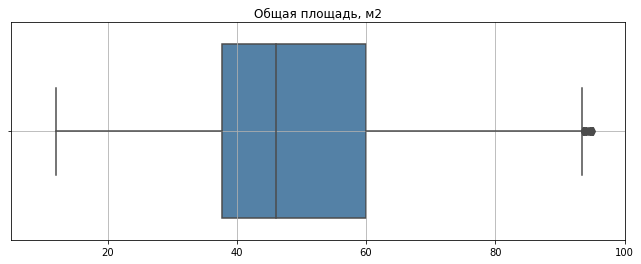

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


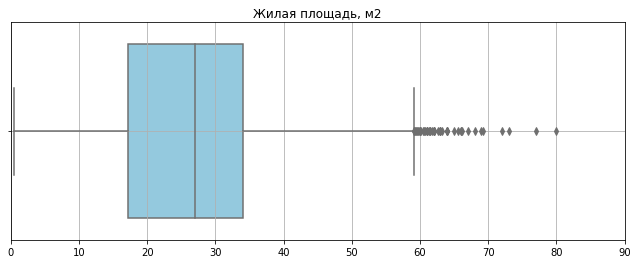

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


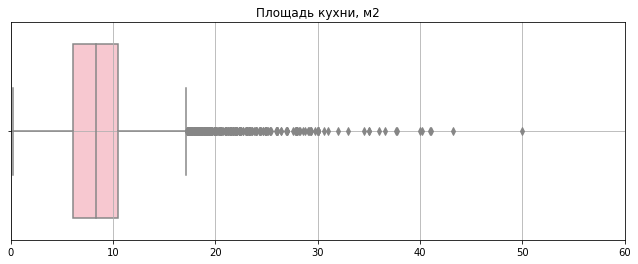

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


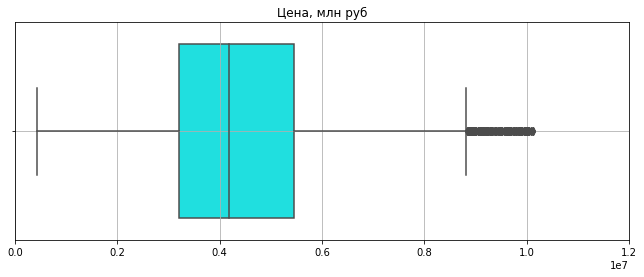

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


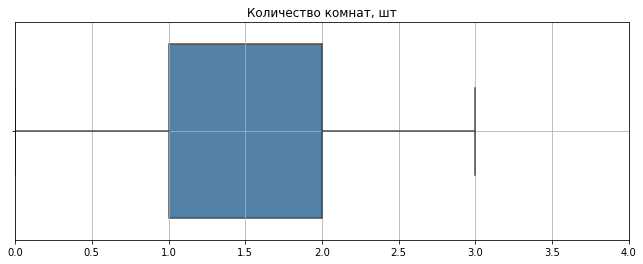

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


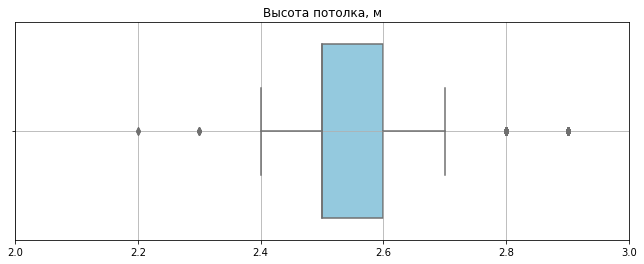

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


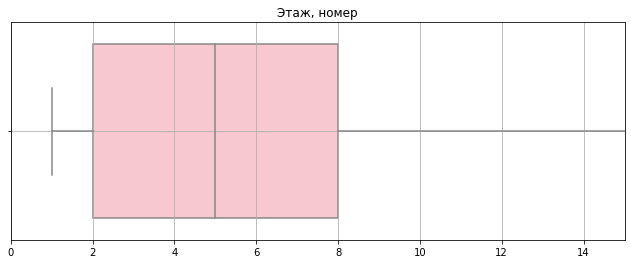

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


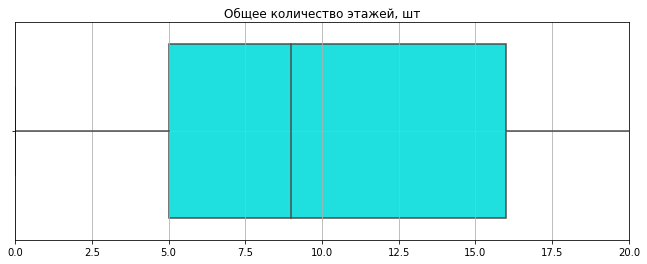

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


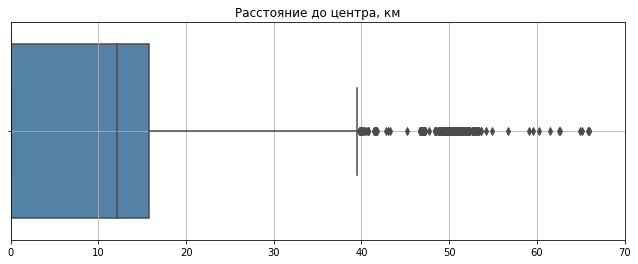

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


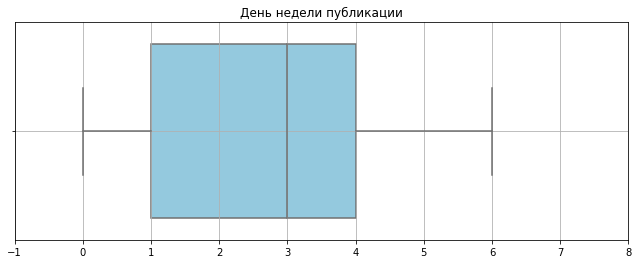

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


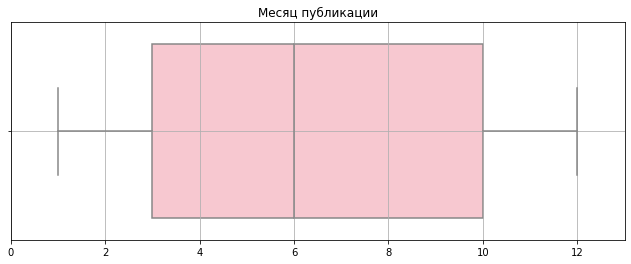

In [ ]:
#составим список столбцов, по которым будем строить графики:
columns_list=['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
              'ceiling_height', 'floor', 'floors_total', 'km_to_center', 'weekday', 'month']
title_list = ["Общая площадь, м2", "Жилая площадь, м2", "Площадь кухни, м2", "Цена, млн руб", "Количество комнат, шт",
              "Высота потолка, м", "Этаж, номер", "Общее количество этажей, шт", "Расстояние до центра, км", "День недели публикации",
              "Месяц публикации"]
xlims=[(5,100), (0,90), (0,60), (0,12000000), (0,4), (2,3), (0,15), (0,20), (0,70), (-1,8), (0,13)]
color_list=['steelblue', 'skyblue', 'pink', 'cyan', 'steelblue', 'skyblue', 'pink', 'cyan', 'steelblue', 'skyblue', 'pink']
for i in range(len(columns_list)):
    plt.figure(figsize=(11,4))
    sns.boxplot(df2[columns_list[i]], color=color_list[i])
    plt.xlim(xlims[i])
    plt.title(title_list[i])
    plt.xlabel('')
    plt.grid()
    plt.show()
    

##### Тип этажа квартиры


count      18648
unique         3
top       другой
freq       13838
Name: floor_categ, dtype: object


<AxesSubplot:>

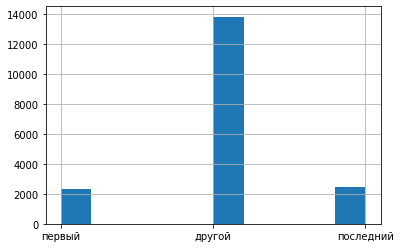

In [ ]:
print(df2['floor_categ'].describe())
df2['floor_categ'].hist()

Очевидно, что большая часть недвижимости - это квартиры. И располагаются они не на первом и не на последнем этажах.

###### вывод:
* Мы выведем среднюю недвижимость Санк-Петербурга и его пригорода, которую описывали графиками. 
 1. общая площадь - в основном, в продаже недвижимость общей площадью от 40 и, примерно, до 60 квадратных метров.
 2. жилая площадь - жилая площадь приблизительно от 17 до 35 квадратных метров.
 3. площадь кухни - от 5 до 11 квадратных метров.
 4. цена объекта - где-то от 3,5 мл рублей и до 5,8 мл рублей.
 5. количество комнат - в среднем, от 1 до 2 комнат. 
 6. высота потолков - 2,5-2,7 метров (норма для данной климатической зоны). 
 7. этаж квартиры - как ни странно, в основном продают квартиры со 2 по 8 этажи.
 8. тип этажа квартиры («первый», «последний», «другой») - и это не первый и не последний этажи. 
 9. общее количество этажей в доме - в основном, это дома от 5 и до 16 этажей (типично). 
 10. расстояние до центра города в метрах - и реально, в основном до центра не более 15 км. Но есть и небольшая доля пригорода (более 60 км от центра Санкт-Петербурга). 
 11. день и месяц публикации объявления - чаще всего публикуют объявления со вторника по пятницу. Но самый любимый день публикации - четверг. Ну и чаще всего люди начинают выкладывать объявления о продаже с марта по октрябрь. Зимой начинается непонятное затишье.
 12. гистограммы по каждому параметру отдельно мы построили ещё на самом верху.

#### Как быстро продавались квартиры:

In [ ]:
df2.columns #вывожу названия колонок, потому что постоянно их забываю

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'balcony', 'locality_name', 'city_сenters_nearest',
       'days_exposition', 'locality_name_upper', 'price_per_sq_m', 'weekday',
       'year', 'month', 'floor_categ', 'km_to_center'],
      dtype='object')

<AxesSubplot:>

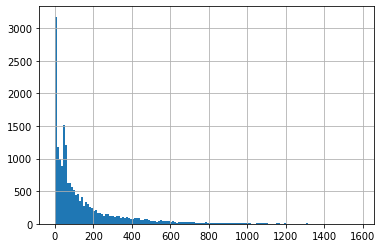

In [ ]:
df2['days_exposition'].hist(bins=150)

<AxesSubplot:>

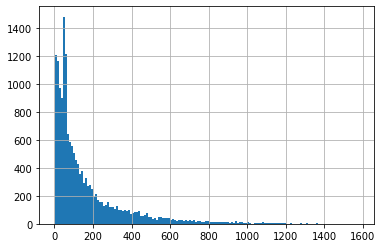

In [ ]:

days_exp = df2.query('days_exposition > 0')['days_exposition']    

days_exp.hist(bins=150)


In [ ]:
print(days_exp.describe())


count    16559.000000
mean       166.222658
std        203.818881
min          1.000000
25%         42.000000
50%         88.000000
75%        209.500000
max       1580.000000
Name: days_exposition, dtype: float64


In [ ]:
days_exp.median()

88.0

In [ ]:
days_exp.mode()

0    45
dtype: int64

В среднем, квартиру продают за 180 дней. Медианное время продажи 95 дней. При этом, согласно моде, больше всего квартир продавалось примерно через 45 дней после публикации. Необычно долгим можно считать время продажи тогда, когда оно уходит за 3 квартиль. Необычно быстрым - когда оно ниже 1 квартиля. 

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

In [ ]:
df2.sample(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_сenters_nearest,days_exposition,locality_name_upper,price_per_sq_m,weekday,year,month,floor_categ,km_to_center
9401,5000000,60.599998,2019-02-27,3,2.5,9,43.0,9,6.5,2,Санкт-Петербург,19005.0,0,Санкт-Петербург,82508.3,2,2019,2,последний,19.0
16480,7650000,48.000000,2016-02-06,1,2.5,12,0.5,5,0.2,1,Санкт-Петербург,14769.0,172,Санкт-Петербург,159375.0,5,2016,2,другой,14.8
12760,3350000,51.000000,2015-01-22,2,2.5,12,30.0,10,0.2,2,Коммунар,0.0,521,Коммунар,65686.3,3,2015,1,другой,0.0
12451,6000000,74.000000,2018-07-07,3,2.5,4,62.0,1,12.0,0,Санкт-Петербург,25129.0,10,Санкт-Петербург,81081.1,5,2018,7,первый,25.1
6487,4499000,36.000000,2018-08-18,1,2.5,25,18.0,4,9.0,0,Санкт-Петербург,10890.0,56,Санкт-Петербург,124972.2,5,2018,8,другой,10.9


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,18648.0,4.423501e+06,1.823187e+06,430000.0,3.200000e+06,4180000.0,5450000.0,1.013000e+07
total_area,18648.0,4.953826e+01,1.498308e+01,12.0,3.770000e+01,46.0,60.0,9.520000e+01
rooms,18648.0,1.785875e+00,7.874301e-01,0.0,1.000000e+00,2.0,2.0,3.000000e+00
ceiling_height,18648.0,2.567117e+00,1.031899e-01,2.2,2.500000e+00,2.5,2.6,2.900000e+00
floors_total,18648.0,1.113197e+01,6.702378e+00,0.0,5.000000e+00,9.0,16.0,6.000000e+01
living_area,18648.0,2.586356e+01,1.278872e+01,0.5,1.720000e+01,27.0,34.0,8.000000e+01
floor,18648.0,6.103335e+00,5.006179e+00,1.0,2.000000e+00,5.0,8.0,3.100000e+01
kitchen_area,18648.0,8.365256e+00,4.206508e+00,0.2,6.100000e+00,8.3,10.5,5.000000e+01
balcony,18648.0,6.053732e-01,9.241329e-01,0.0,0.000000e+00,0.0,1.0,5.000000e+00
city_сenters_nearest,18648.0,1.145613e+04,9.956635e+03,0.0,0.000000e+00,12068.5,15795.0,6.596800e+04


In [ ]:
#Составим матрицу корреляций, которые просят по заданию в Практикуме:
df2_grouped = df2[['total_area', 'last_price', 'living_area', 'kitchen_area',
                         'ceiling_height', 'rooms', 
                         'days_exposition', 'km_to_center', 
                         'month','weekday', 'year','floor_categ']]
df2_grouped.corr().style.background_gradient()

,total_area,last_price,living_area,kitchen_area,ceiling_height,rooms,days_exposition,km_to_center,month,weekday,year
total_area,1.000000,0.632866,0.695200,0.329034,0.098537,0.808253,0.056515,0.013231,0.003587,-0.005145,-0.048733
last_price,0.632866,1.000000,0.401002,0.373892,0.213779,0.385744,0.014844,0.194930,0.001354,-0.008317,0.021624
living_area,0.695200,0.401002,1.000000,0.293158,0.050253,0.710087,0.059587,0.045480,0.008788,-0.021273,-0.060736
kitchen_area,0.329034,0.373892,0.293158,1.000000,0.214980,0.040045,0.054644,0.016202,0.027115,-0.021335,-0.032163
ceiling_height,0.098537,0.213779,0.050253,0.214980,1.000000,-0.058279,0.024228,0.007734,-0.013838,-0.023211,0.053450
rooms,0.808253,0.385744,0.710087,0.040045,-0.058279,1.000000,0.032685,0.013083,-0.008881,-0.002017,-0.021237
days_exposition,0.056515,0.014844,0.059587,0.054644,0.024228,0.032685,1.000000,-0.001288,0.003184,-0.014081,-0.608920
km_to_center,0.013231,0.194930,0.045480,0.016202,0.007734,0.013083,-0.001288,1.000000,-0.007560,0.002310,-0.020508
month,0.003587,0.001354,0.008788,0.027115,-0.013838,-0.008881,0.003184,-0.007560,1.000000,0.012835,-0.265401
weekday,-0.005145,-0.008317,-0.021273,-0.021335,-0.023211,-0.002017,-0.014081,0.002310,0.012835,1.000000,-0.003610


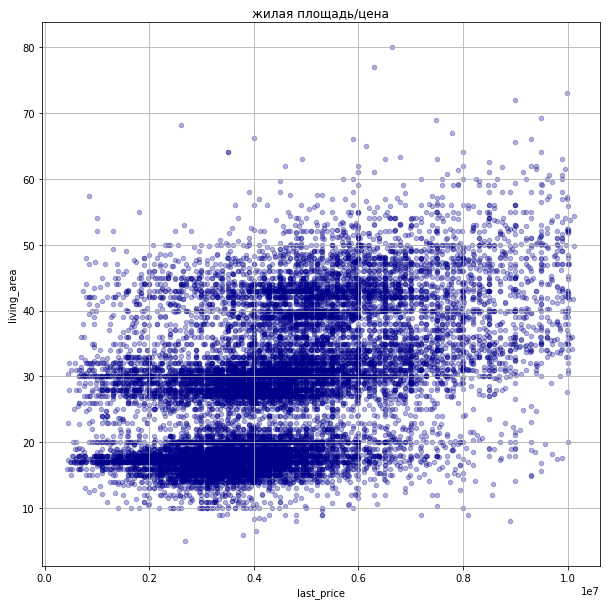

In [ ]:
ax1 = df2.loc[df2['living_area'] >= 5].plot.scatter(x='last_price', title='жилая площадь/цена',
                      y='living_area', alpha=0.3, grid=True,
                      c='DarkBlue',
                      colormap='viridis',
                      figsize=(10,10))

Мы видим, что есть 3 основных метража общей жилой площади: от 15 до 20 квадратных метра, от 25 до 32 квадратных метра, от 40 и до 45 квадратных метра (там плотность точек больше всего). Соответственно цены на них колеблятся: от 2 до 5 млн рублей, от 3 до 6 млн рублей, и от 4 до 7 млн рублей. Прослеживается тренд что с увеличением жилой площади увеличивается и цена. 

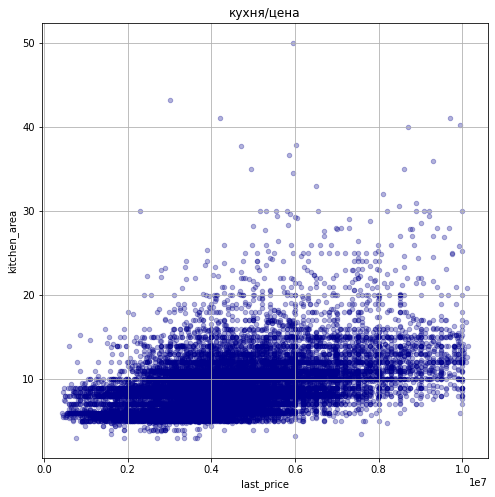

In [ ]:
ax1 = df2.loc[df2['kitchen_area'] >= 3].plot.scatter(x='last_price', title='кухня/цена',
                      y='kitchen_area', alpha=0.3, grid=True,
                      c='DarkBlue',
                      colormap='viridis',
                      figsize=(8,8))

В общем, не сказала бы что от увеличения кухни зависит конечная цена. Совсем небольшой тренд на это прослеживается.

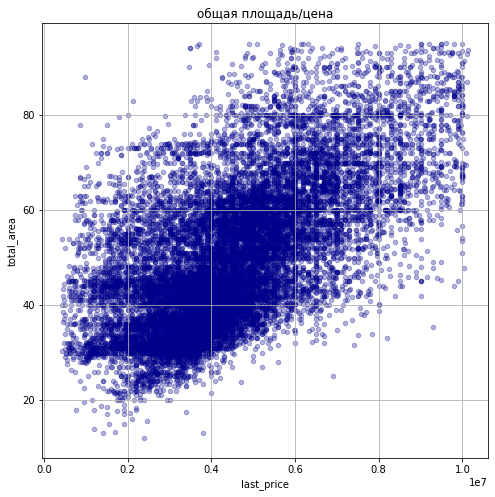

In [ ]:
ax1 = df2.loc[df2['total_area'] >= 3].plot.scatter(x='last_price', title='общая площадь/цена',
                      y='total_area', alpha=0.3, grid=True,
                      c='DarkBlue',
                      colormap='viridis',
                      figsize=(8,8))

Ну тут очевидно. Чем больше площадь - тем выше цена. Тренд очевидный. 

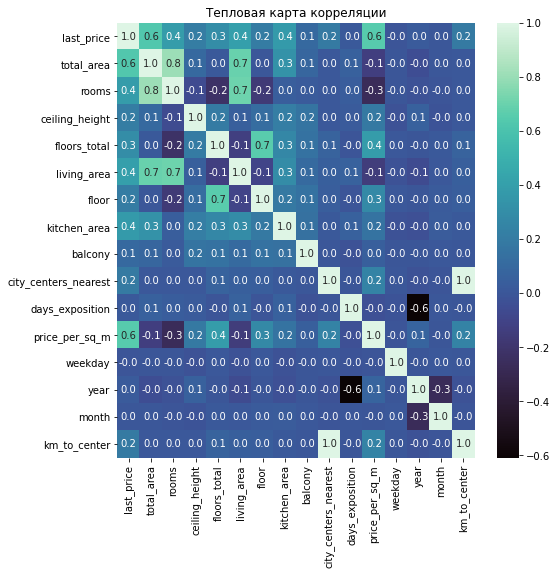

In [ ]:
# построим тепловую карту, коэффициенты корреляции окгруглим до 1 знака
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True, cmap='mako', fmt='.1f')
plt.title('Тепловая карта корреляции')
plt.show()

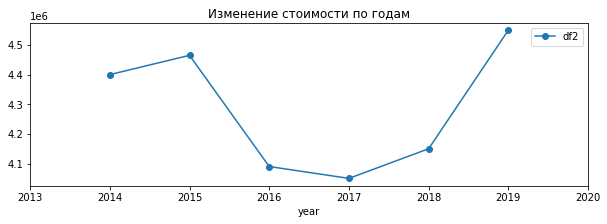

In [ ]:
# для надежности сравним показатель цены в зависимости от года:
df2.groupby('year')['last_price'].agg('median').plot(
    x='year', style='o-', xlim=(2013, 2020), figsize=(10,3), legend = True
)

plt.legend(['df2'])
plt.title('Изменение стоимости по годам')
plt.show()

Мы видим, что очищенные данные имели пик в 2014-2015 году и потом в 2019. Видно, что в 2019 году люди стали активнее скупать жилье. Может, это связано с введением санкций против РФ (в 2014 году). После 15 года был резкий спад, ситуация немного стала понятней, все, кто хотел купить жилье в 2014 и 15 годах - сделали это. Потом, видимо, к 2019 у людей опять появились деньги и про ковид ещё никто не знал. 

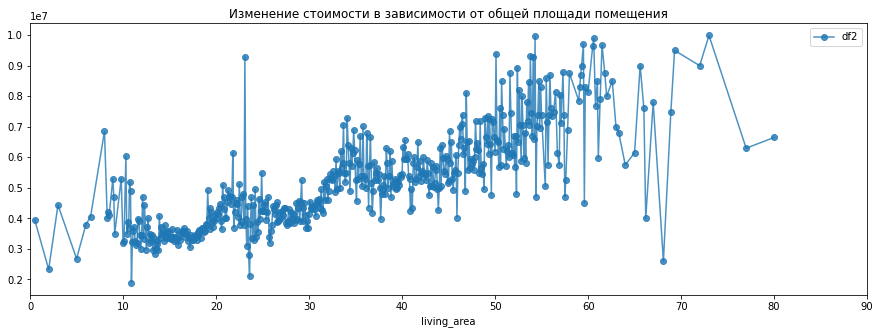

In [ ]:
# для надежности сравним показатель цены в зависимости от общей жилой :
df2.groupby('living_area')['last_price'].agg('median').plot(
    x='price', style='o-', xlim=(0, 90), figsize=(15,5), legend = True, alpha=0.8
)

plt.legend(['df2'])
plt.title('Изменение стоимости в зависимости от общей площади помещения')
plt.show()

Ну, тут и там и там видно, что как мы и говорили выше - чем больше площадь, тем выше цена. Тренд линии идёт вверх. 

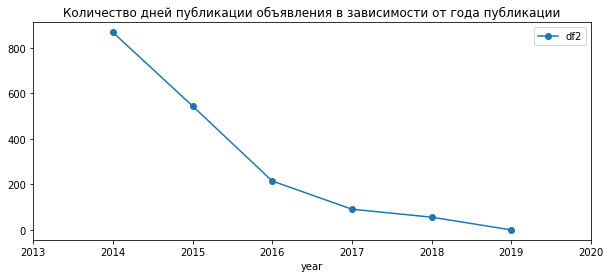

In [ ]:
# для надежности сравним показатель цены в зависимости от общей жилой :
df2.groupby('year')['days_exposition'].agg('median').plot(
    x='year', style='o-', xlim=(2013, 2020), figsize=(10,4), legend = True, alpha=1
)

plt.legend(['df2'])
plt.title('Количество дней публикации объявления в зависимости от года публикации')
plt.show()

Видно, что с годами жилье стали покупать быстрее. И в целом те, кто публиковал объявления стали быстрее продавать свою недвижимость. Всё-таки, видимо, к 2019 году финансовые возможности граждан РФ или прибывших из-за рубежа в РФ были лучше, чем в 2014. Потому что ипотека - это тоже удел граждан со средним достатком. Нет достатка - нет ипотеки. 

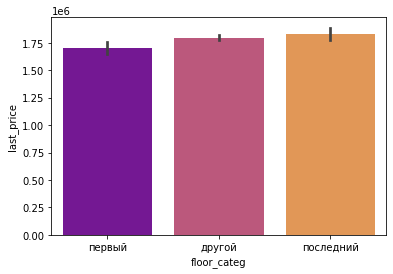

In [ ]:
# для надежности сравним показатель цены и категории этажа :
sns.barplot(x ='floor_categ', y ='last_price', data = df2,
            palette ='plasma', estimator = np.std);

Очень интересно вышло, Цена тем выше - чем выше этаж. Последние этажи - самые дорогие. Логично - над головой никто не ходит. 

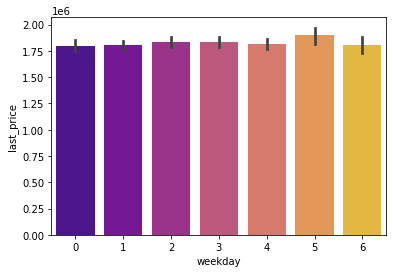

In [ ]:
sns.barplot(x ='weekday', y ='last_price', data = df2,
            palette ='plasma', estimator = np.std);

Ну, не сказала бы что прям есть что-то очень очевидное. Вроде получается, что под конец недели - цена публикации выше. А в воскресенье - самая низкая. 

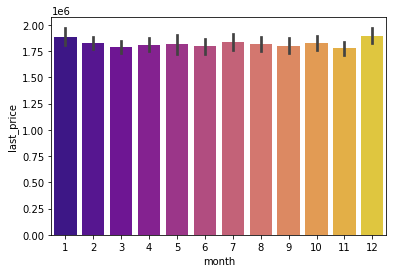

In [ ]:
sns.barplot(x ='month', y ='last_price', data = df2,
            palette ='plasma', estimator = np.std);

Самые высокие цены за свою недвижимость продавцы назначают - в январе и феврале. С началом нового года, короче. Потом, видимо, надежда продать быстро и дорого сходит на нет, и цена уменьшается. 

**Вывод:** есть небольшие корреляции, но нельзя сказать что очень надежные. Давайте считать, что мы можем рассматривать корреляцию, более-менее достоверной только в том случае, если коэффициент 0,6 или более (или -0,6 и более). 
___
* можем выделить следующие моменты:
1. конечная цена тем выше, чем больше общая площадь квартиры;
2. по всей видимости, в зависимости от года продажи квартиры - наблюдалась зависимость того, как долго объявление о продаже будет висеть в сети. Чем год ближе к 2020, тем меньше дней висело объявление о продаже. 
3. На цену, в конечном итоге, более всего влияет площадь помещения, все остальные параметры, видимо, людей в этот промежуток не сильно волновали. Даже удалённость от центра - не сказать чтоб прям имела большое значение. 
4. Самую высокую цену за свою недвижимость продавцы назначают с наступлением нового года. К весне цена падает и лишь немного меняется в течение остального года. 
5. Самые дорогие квартиры - на верхнем этаже. Самые дешевые - на первом. 
6. С середины недели и до субботы - продавцы назначают самые высокие цены за недвижимость. 

##### Самые дорогие и самые дешёвые метры, топ - 10 объявлений о продаже (населённый пункт)

Сгруппируем датафрейм по названию насёленого пункта и посчитаем среднюю ценую квадратного метра. Выведем топ-10. 

In [ ]:
df2.groupby('locality_name_upper').agg({'price_per_sq_m':'mean'}).sort_values(by='price_per_sq_m', ascending=False).head(10)

,price_per_sq_m
locality_name_upper,
Лисий Нос,113728.350000
Санкт-Петербург,104643.032107
Сестрорецк,101154.988732
Зеленогорск,100123.735000
Пушкин,99947.858108
Мистолово,98545.200000
Левашово,96997.700000
Кудрово,95132.389009
Парголово,90718.404984


* В таблицу топ-10 попали неизвестные локации, по которым нет данных. 
* Теперь сделаем то же самое, но топ 10 с самой низкой ценой за квадратный метр:

In [ ]:
df2.groupby('locality_name_upper').agg({'price_per_sq_m':'mean'}).sort_values(by='price_per_sq_m', ascending=True).head(10)

,price_per_sq_m
locality_name_upper,
Старополье,11206.233333
Свирь,11481.500000
Вахнова Кара,11688.300000
Выскатка,12335.450000
Совхозный,12629.150000
Малая Романовка,12724.600000
Тесово-4,12931.000000
Бор,13157.900000
Сижно,13709.700000


Средняя цена квадратного метра в населённых пунктах с наибольшим числом объявлений:

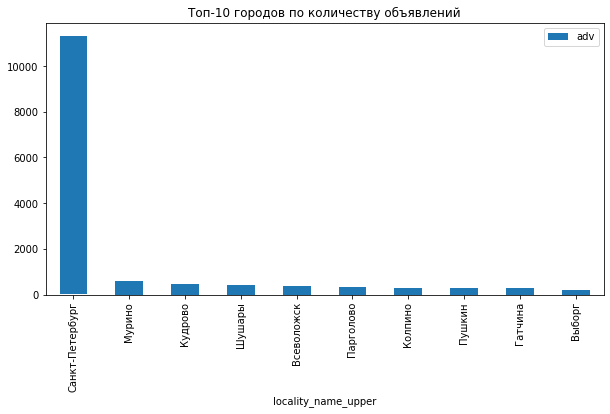

,adv,mean_price_per_sq_m
locality_name_upper,,
Санкт-Петербург,11331,104643.0
Мурино,578,86270.8
Кудрово,464,95132.4
Шушары,426,78762.8
Всеволожск,365,67029.5
Парголово,321,90718.4
Колпино,297,75930.7
Пушкин,296,99947.9
Гатчина,279,68377.0


In [ ]:
top_10_loc = df2.pivot_table(index='locality_name_upper', 
                                     values='price_per_sq_m', 
                                     aggfunc=['count', 'mean']
                                    ).round(1)
top_10_loc.columns = ['adv', 'mean_price_per_sq_m']
top = top_10_loc.sort_values(by='adv', ascending=False)[:10]
top.plot(y='adv', kind='bar', figsize=(10,5))
donut=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(donut)
plt.title('Топ-10 городов по количеству объявлений')
plt.show()
top

**Вывод:** лидерство в цене за квадратный метр г. Санкт-Петербург и г. Зеленогорск. Самая низкая цена за квадратный метр в Старополье и в Свири. Ну а чаще всего недвижимость продают в Санкт-Петербурге (где и очень большая цена за квадратный метр жилья, почти 115 тысяч за метр), а так же в Мурино, замыкает этот ряд - Выборг (с ценой около 58 тысяч за метр). 

#### Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра

Можно пойти разными путями. Можно написать функцию, которая отсечет Питер от остальных и там уже рассматривать данные. А можно попробовать использовать метод .query(). Так как именно его мы проходили в последнем спринте, то, давайте использовать его. Так как мы понимаем, что центр - только в самом Питере, то задим условие, что метод должен отсекать те значения, которые находятся далее 10 км от центра (и Питер и пригород). 

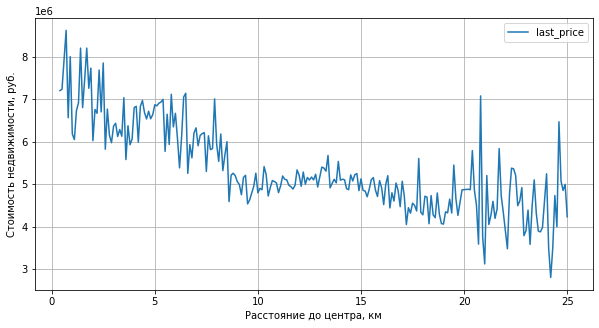

In [ ]:
ptr_centr = df2.query('0 < km_to_center <= 25').pivot_table(index='km_to_center', values='last_price', 
                                                        aggfunc='mean').plot(y='last_price', kind='line', figsize=(10,5), grid=True)
plt.ylabel('Стоимость недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.title('')
plt.show()

* По графику видно, что чем дальше от центра, тем ниже средняя цена за квадратный метр недвижимости в г. Санкт-Петербург. После 8-10 км, похоже, график уходит на плато. 
* Условный центр Петербурга, исходя из графика, находится внутри радиуса 10 км.

## Общий вывод

Формулируем объединённый вывод, на основе промежуточных:
___
1. В данных были пропуски, были неправильные названия столбцов. Удалили неявные дубликаты. Мы привели их к более "типичному" виду. 
2. Пропуски, по возможности, заменили. Где не заменили - оставили. Где было не чем менять и пропусков было много - удалили Series из анализа. 
3. Сам csv файл изначально имел не верные разделители. Мы исправили.
4. Сформировали новые наборы столбцов, которые помогли нам в анализе данных. 
5. Пришлось обращаться к дополнительной документации, чтобы заполнить пропупуски в некоторых столбцах (высота потолка).
6. Обнаружили, что имеет место "машинный фактор". Там, где данные должны были формироваться автоматически - было более 20% пропусков. Необходимо **обратить на это внимание тех, кто занимается обслуживанием данного ПО**. Такое количество пропусков является большим. (расстояния). 
7. Для анализа данных применяли множество методов: фильтрации, построения графиков, создавали функции, циклы, делали сводные таблицы. 
___
1. Наиболее дорогое жилье, очевидно, находится внутри Санкт-Петербурга, а так же в г. Зеленогороске (около 115 тысяч рублей за квадратный метр).
2. Самая высокая цена за квадратный метр в Питербурге и окрестностях около 100.000 рублей +- 20.000 рублей. 
3. Условным центром Санкт-Петербурга можно назвать радиус 10 км (где находится самое дорогое жилье). 
4. Больше всего цена зависит от размера жилого помещения. Чем больше общая площадь недвижимости - тем больше цена, при этом остальные параметры не слишком то и влияют на цену. Даже условная удалённость от центра. 
5. В данных были спорные моменты: элитное жилье, с бешеной стоимостью и подобное. Такие данные мы в анализе отсекли. 
6. В 2019 году наблюдался период финансовой стабильности у граждан РФ и они активно вкладывались в жильё. 
7. В 2014-2015 годах так же был всплеск активности по покупке жилья, скорее всего, связанного с введением санкций против РФ. 
8. За 5 лет (с 2014 до 2019) года жилье стало продаваться быстрей. 
9. Жилье на последнем этаже дороже всего, а на первом - дешевле. 
10. Наиболее высокую цену за недвижимость продавцы выставляют после нового года. 
11. В середине недели и до субботы - продавцы назначают самую высокую цену за свою недвижимость. 